In [1]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import latex
import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['text.usetex'] = True
latex_engine = 'pdflatex'
latex_elements = {
    'extrapackages': r'\usepackage{physics}',
    'extrapackages': r'\usepackage{amsmath}'
}
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)


%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:120])
colors_ls_cyc = itertools.cycle(colors_ls)
markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists


USE_SYMMETRIES = True
BOUNDARY_COND = 'OBC'

dir = "../results/" + ("symmetries/" if USE_SYMMETRIES else "") + BOUNDARY_COND + '/'
print(dir)

In [14]:
import decimal

def format_number(num):
    try:
        dec = decimal.Decimal(num)
    except:
        return 'bad'
    tup = dec.as_tuple()
    delta = len(tup.digits) + tup.exponent
    digits = ''.join(str(d) for d in tup.digits)
    if delta <= 0:
        zeros = abs(tup.exponent) - len(tup.digits)
        val = '0.' + ('0'*zeros) + digits
    else:
        val = digits[:delta] + ('0'*tup.exponent) + '.' + digits[delta:]
    val = val.rstrip('0')
    if val[-1] == '.':
        val = val[:-1]
    if tup.sign:
        return '-' + val
    return val

def order_of_magnitude(a_value):
    a_value = np.round(a_value, 6)
    if a_value - int(a_value) != 0:
        a_str = format_number(f'{a_value}')
        a_str = a_str.split(".")[1]
        return len(a_str)
    else:
        return 0

In [3]:
def info_base(L, J1, J2, delta1, delta2, eta1, eta2, hx, hz):
    arr = [J1, J2, delta1, delta2, eta1, eta2, hx, hz]
    names = ['J1', 'J2','d1', 'd2', 'e1', 'e2', 'hx', 'hz']
    info = "_L=%d"%L
    for i, var in enumerate(arr):
        n = order_of_magnitude(var)
        info += str(",%s={:.%df}"%(names[i], n)).format(round(var, n))
    return info

def info_sym(L, J1, J2, delta1, delta2, eta1, eta2, hx, hz, k, p, zx, zz):
    info = info_base(L, J1, J2, delta1, delta2, eta1, eta2, hx, hz)
    if BOUNDARY_COND == 'PBC':                          info += ",k=%d"%k
    if BOUNDARY_COND == 'OBC' or (k==0 or k==L//2):     info += ",p=%d"%p
    if hz == 0:                                         info += ",zx=%d"%zx
    if hx == 0 and (L % 2 == 0 or hz != 0):             info += ",zz=%d"%zz
    return info

def info_dis(L, J1, J2, delta1, delta2, eta1, eta2, hx, hz, w, pb):
    info = info_base(L, J1, J2, delta1, delta2, eta1, eta2, hx, hz)
    n = order_of_magnitude(w)
    info +=  str(",w={:.%df}"%n).format(round(w, n))
    info += ",pb=%d"%pb
    return info

In [4]:
parity_sectors = [-1, 1]
def get_sectors(L, hx, hz):
    translation_real_sectors = [0, L // 2] if BOUNDARY_COND == 'PBC' else [0]
    translation_imag_sectors = range(1, L // 2)
    
    spin_flip_X_sectors = [-1, 1] if hz == 0 else [1]
    spin_flip_Z_sectors = [-1, 1] if hx == 0 and (L % 2 == 0 or hz != 0) else [1]

    real_sectors = [[ks, ps, zx, zz] for ks in translation_real_sectors for ps in parity_sectors for zx in spin_flip_X_sectors for zz in spin_flip_Z_sectors]
    imag_sectors = [[kx, 1, zx, zz] for kx in translation_imag_sectors for zx in spin_flip_X_sectors for zz in spin_flip_Z_sectors]

    return real_sectors, imag_sectors

$$H=J\sum_\ell(1-\eta)S^x_\ell S^x_{\ell+1} + (1+\eta)S^y_\ell S^y_{\ell+1} + \Delta S^z_\ell S^z_{\ell+1}$$
$$J^xJ^y\pm J^xJ^z\pm J^yJ^z=0\qquad\rightarrow\qquad 1-\eta^2\pm\Delta(1-\eta)\pm\Delta(1+\eta)=0$$
$$\Delta=\pm\frac{1}{2}(1-\eta^2)\qquad \vee \qquad \Delta=\pm\frac{1}{2\eta}(1-\eta^2)$$

1024 1024
1024 1024
1024 1024
1024 1024
2048 2048
2048 2048
2048 2048
2048 2048
4096 4096
4096 4096
4096 4096
4096 4096
8192 8192
8192 8192
8192 8192
8192 8192
16384 16384
16384 16384
16384 16384
16384 16384


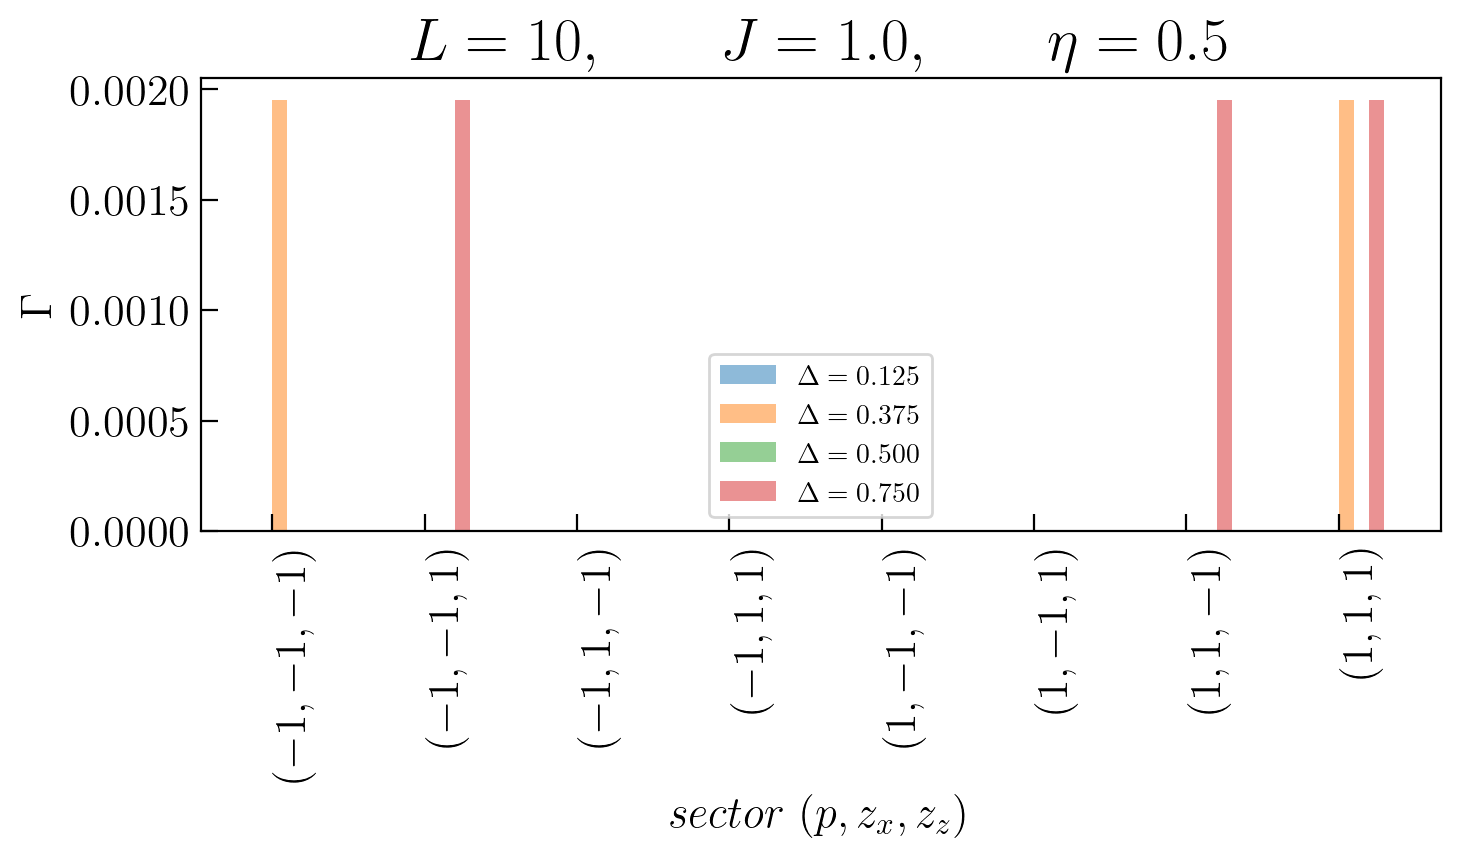

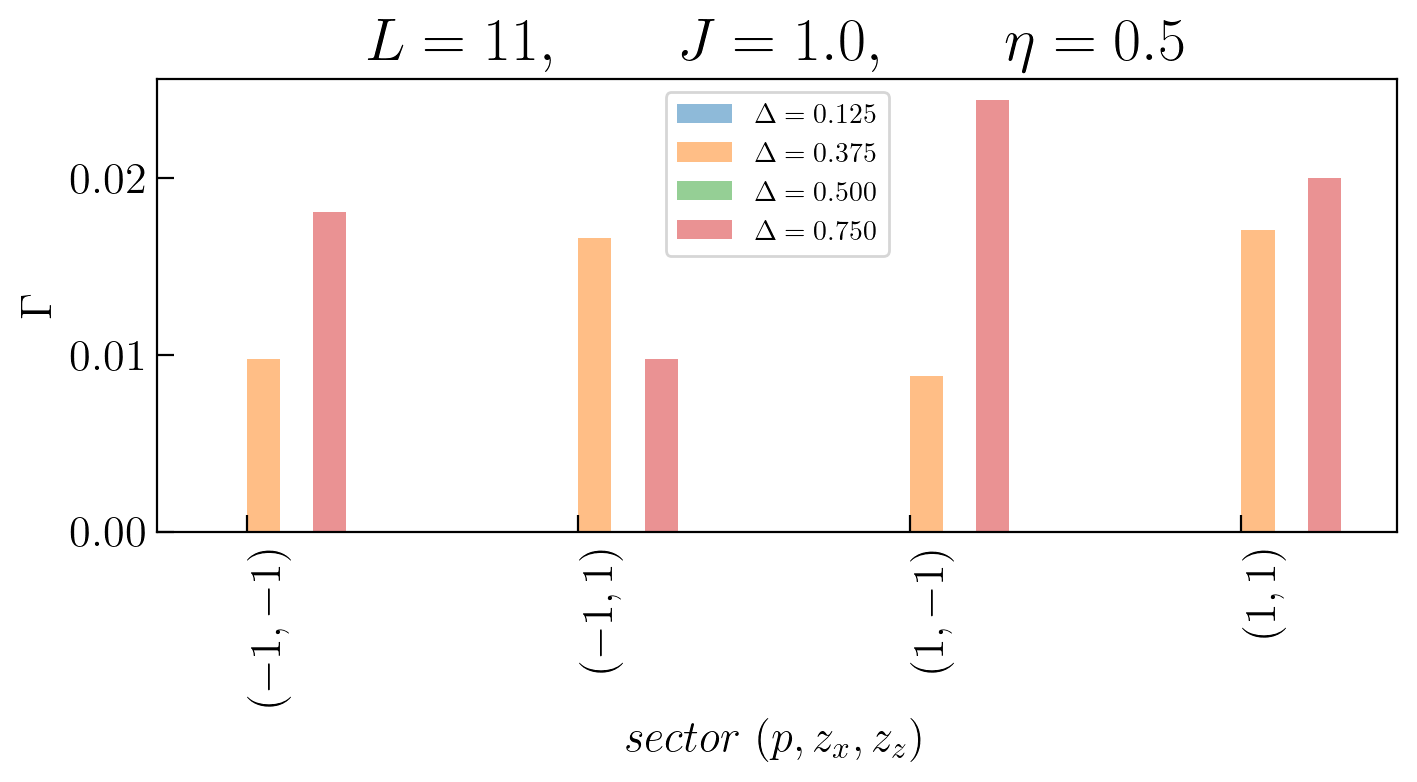

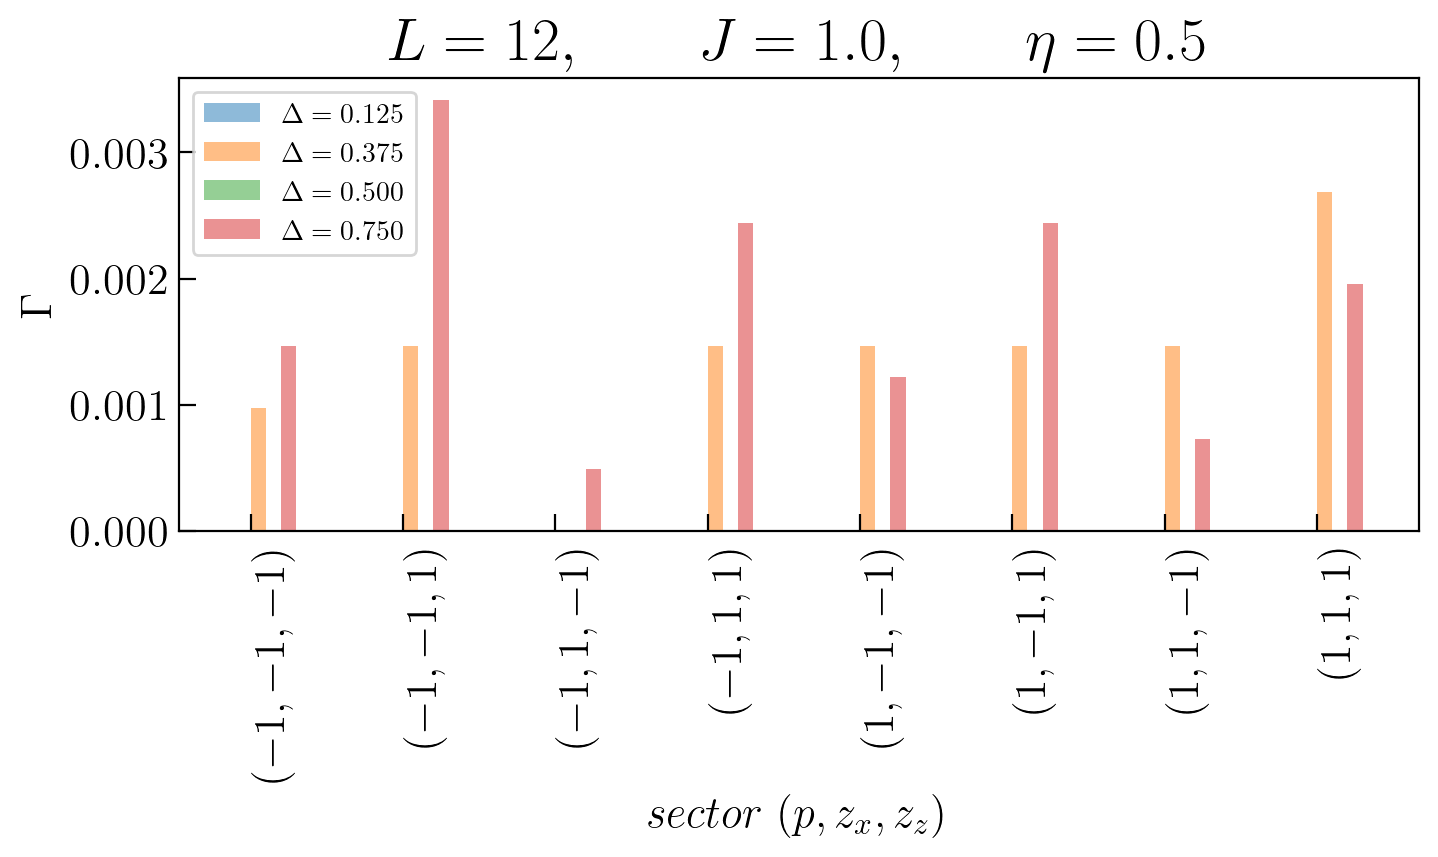

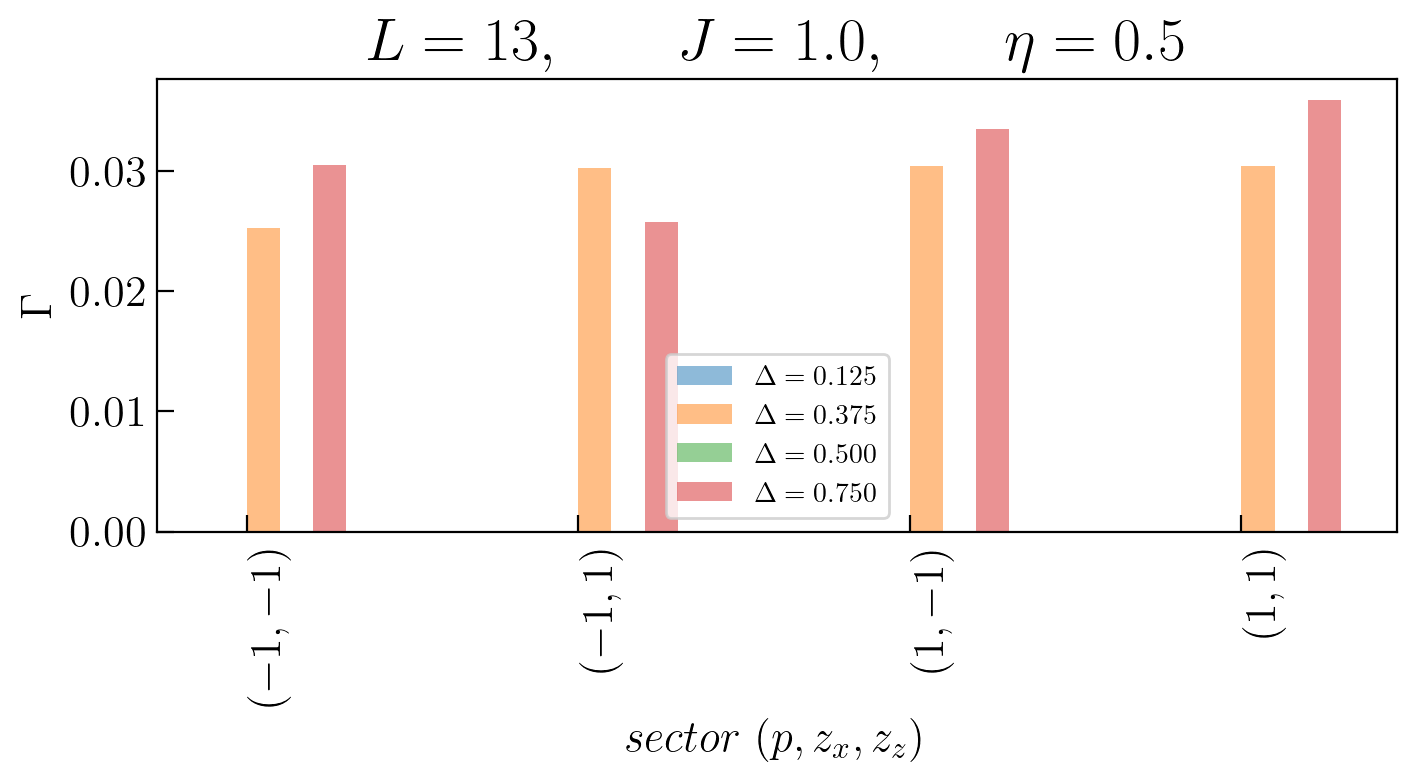

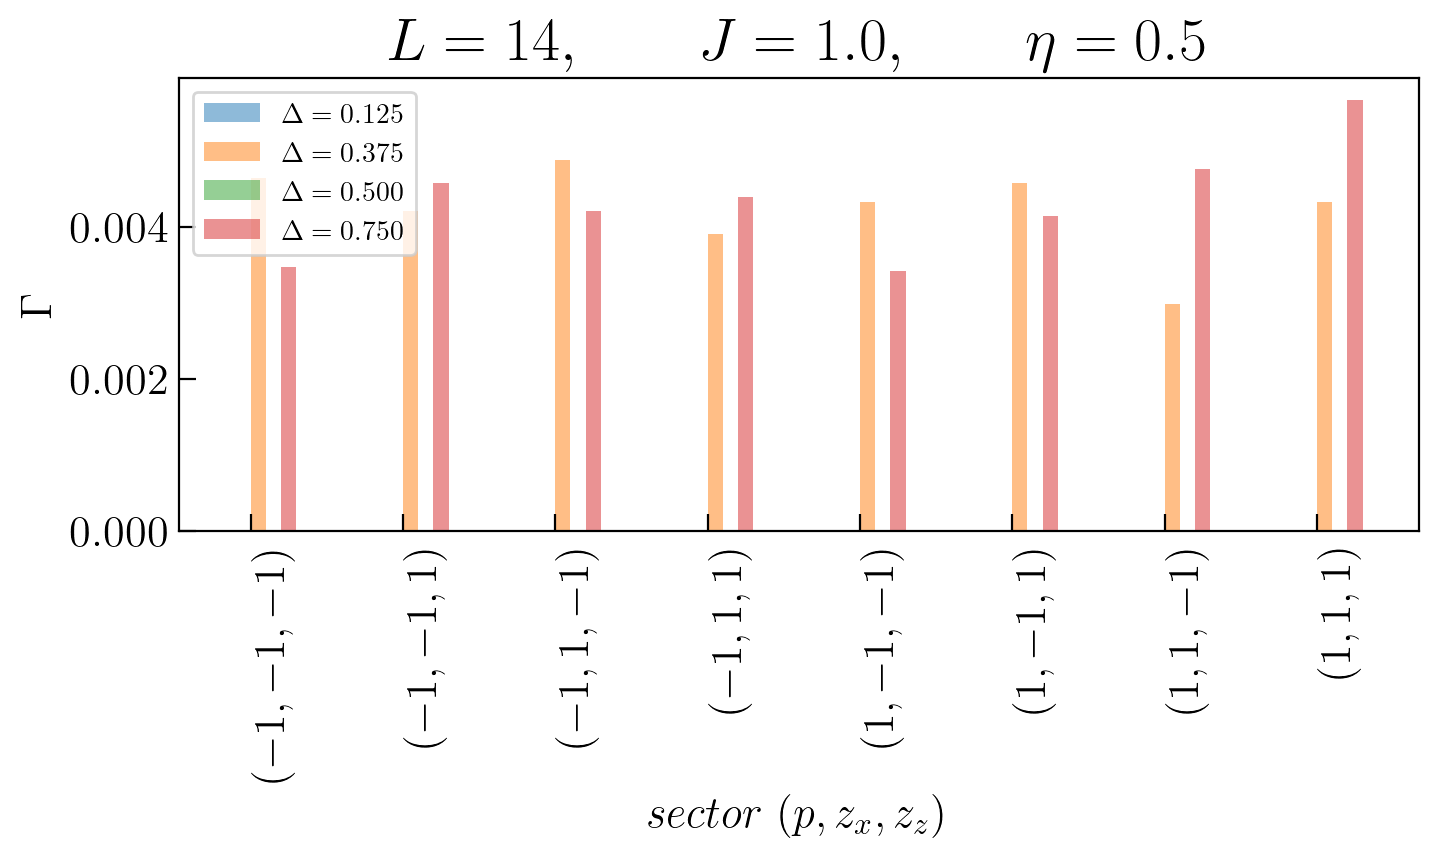

In [6]:

L=12
J1=1.0
d1=0.125
e1=0.5

J2=0.0
d2=0.0
e2=0.0

hx=0.0
hz=0.0

k=0
p=1
zx=1
zz=1

sizes = np.array([10, 11, 12, 13, 14]) if BOUNDARY_COND == 'OBC' else np.array([14, 15, 16])
deltas = [0.125, 0.375, 0.5, 0.75]
degen_sum = [[] for ii in range(len(deltas))]
for L in sizes:

    fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(8,3), dpi = 200, sharey=True, sharex=True)

    real_sec, imag_sec = get_sectors(L, hx, hz)

    dim_tot = 2**L
    for ii, d1 in enumerate(deltas):
    #for d1 in [0.75]:

        tot_degen = []
        sector_names = []
        dim_check = 0
        for [ks, ps, zxs, zzs] in (real_sec):
            sec_str = ""
            if BOUNDARY_COND == 'PBC':                          sec_str += "$(%d\pi/L$,"%(2*ks)
            else:                                               sec_str += "$($"
            if BOUNDARY_COND == 'OBC' or (k==0 or k==L//2):     sec_str += "$%d$"%ps
            if hz == 0:                                         sec_str += "$,%d$"%zxs
            if hx == 0 and (L % 2 == 0 or hz != 0):             sec_str += "$,%d)$"%zzs
            else:                                               sec_str += "$)$"
            sector_names.append(sec_str)

            name = dir + 'DIAGONALIZATION/' + info_sym(L, J1, J2, d1, d2, e1, e2, hx, hz, ks, ps, zxs, zzs) + ".hdf5"
            degen_num = 0
            if exists(name):
                with h5py.File(name, "r") as file:
                    energies = np.array(file.get('eigenvalues/dataset')[0])
                    dim = energies.size
                    dim_check += dim

                    #energies = np.round(energies, 15)
                    e_list = list(energies)
                    degen_num = 0
                    degen = 0
                    some_sum = 0
                    for Eueue in energies:
                        num_of_occur = e_list.count(Eueue)
                        #if num_of_occur > 4:
                        #    print(L, ps, xs, Eueue, num_of_occur)
                        some_sum += num_of_occur
                        if num_of_occur > 1:
                            #print(Eueue, num_of_occur)
                            degen_num += 1
                        else:
                            degen += 1
                    
                    tot_degen.append(degen_num / dim_tot)
                    if degen + degen_num != dim:
                        print(L, ps, zzs, zxs, degen, degen_num, num_of_occur, dim)
            else:
                a=1
                print(name)
        print(dim_check, dim_tot)
        data = {'sectors': sector_names, 'degeneracies': tot_degen}
        
        
        ydata = np.array(data['degeneracies'])
        degen_sum[ii].append(np.sum(ydata))
        width = 0.1
        shift = - width/2 + width * ii
        bins = np.array([x + shift for x in range(1, len(ydata) + 1)])
        axis.bar(bins, ydata, width = width, label=r"$\Delta=%.3f$"%d1, linewidth=3, alpha=0.5)

        axis.set_xticks([x for x in range(1,len(ydata) + 1)])
    axis.set_xticklabels(data['sectors'], rotation=90, rotation_mode="anchor", ha="right")

    axis.legend()
        
    axis.set_ylabel(r"$\Gamma$", fontsize=16)
    axis.set_xlabel(r"$sector\ (p,z_x,z_z)$", fontsize=16)
    axis.tick_params(axis='both', which='major', direction="in",length=6, labelsize=16)#, length=font_size-4, width=0.05*font_size)
    axis.tick_params(axis='both', which='minor', direction="in",length=3, labelsize=16)#, length=0.2*(font_size-4), width=0.05*font_size)
    
    axis.set_title(r"$L=%d,\qquad J=%.1f,\qquad \eta=%.1f$"%(L, J1, e1), fontsize=22 )


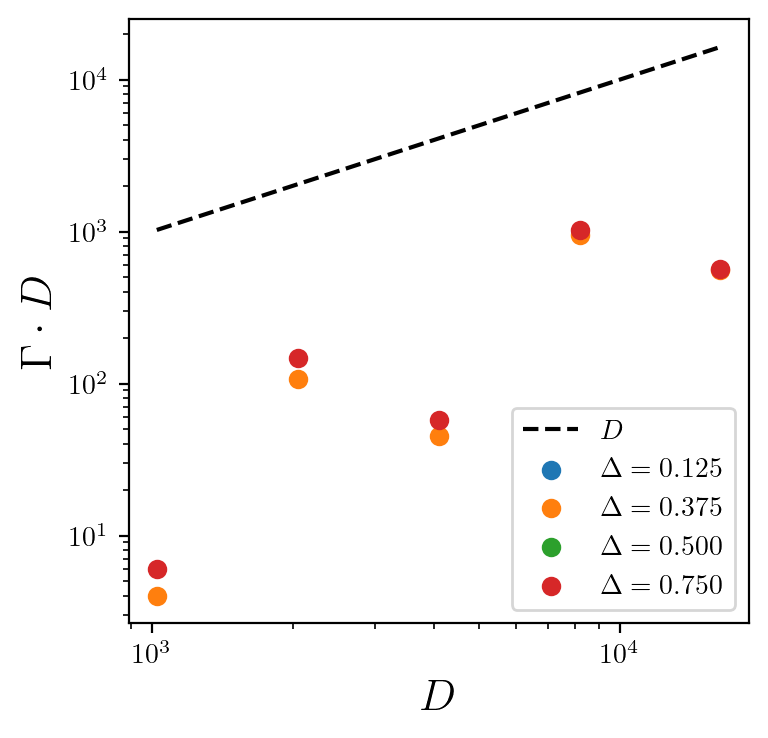

In [7]:

fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(4,4), dpi = 200, sharey=True, sharex=True)

ax.plot(2**sizes, 2**sizes, ls='--', color='black', label=r"$D$")
for ii, del1 in enumerate(deltas):
    deg = np.array(degen_sum[ii])
    ax.scatter(2**sizes, 2**sizes * deg, label=r"$\Delta=%.3f$"%del1)
ax.set_xscale('log')
ax.set_yscale('log')
        
ax.set_ylabel(r"$\Gamma\cdot D$", fontsize=16)
ax.set_xlabel(r"$D$", fontsize=16)
ax.legend()

[0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84]
10 0.65 2.025156979046019 2.0421247916886154 0.39396942666651175 0.0
10 0.66 2.027103331916627 2.0421247916886154 0.40961333523778803 0.0
10 0.67 2.0288389422504136 2.0421247916886154 0.4088825629161299 0.0
10 0.68 2.030414657818794 2.0421247916886154 0.4091392474885939 0.0
10 0.69 2.0318689900382667 2.0421247916886154 0.4096473085615268 0.0
10 0.7 2.0332303472890705 2.0421247916886154 0.4075394261123464 0.0
10 0.71 2.034519272382344 2.0421247916886154 0.4011098913661241 0.0
10 0.72 2.035750349752006 2.0421247916886154 0.39775775380494816 0.0
10 0.73 2.0369337287871496 2.0421247916886154 0.3968717263990095 0.0
10 0.74 2.0380763727832005 2.0421247916886154 0.41169575815728 0.0
10 0.75 2.0410883380367633 2.0421247916886154 0.4082861042416735 0.00390625
10 0.76 2.0402578722937497 2.0421247916886154 0.41129080539886304 0.0
10 0.77 2.0413030456860204 2.0421247916886154 0.40904543968101653 

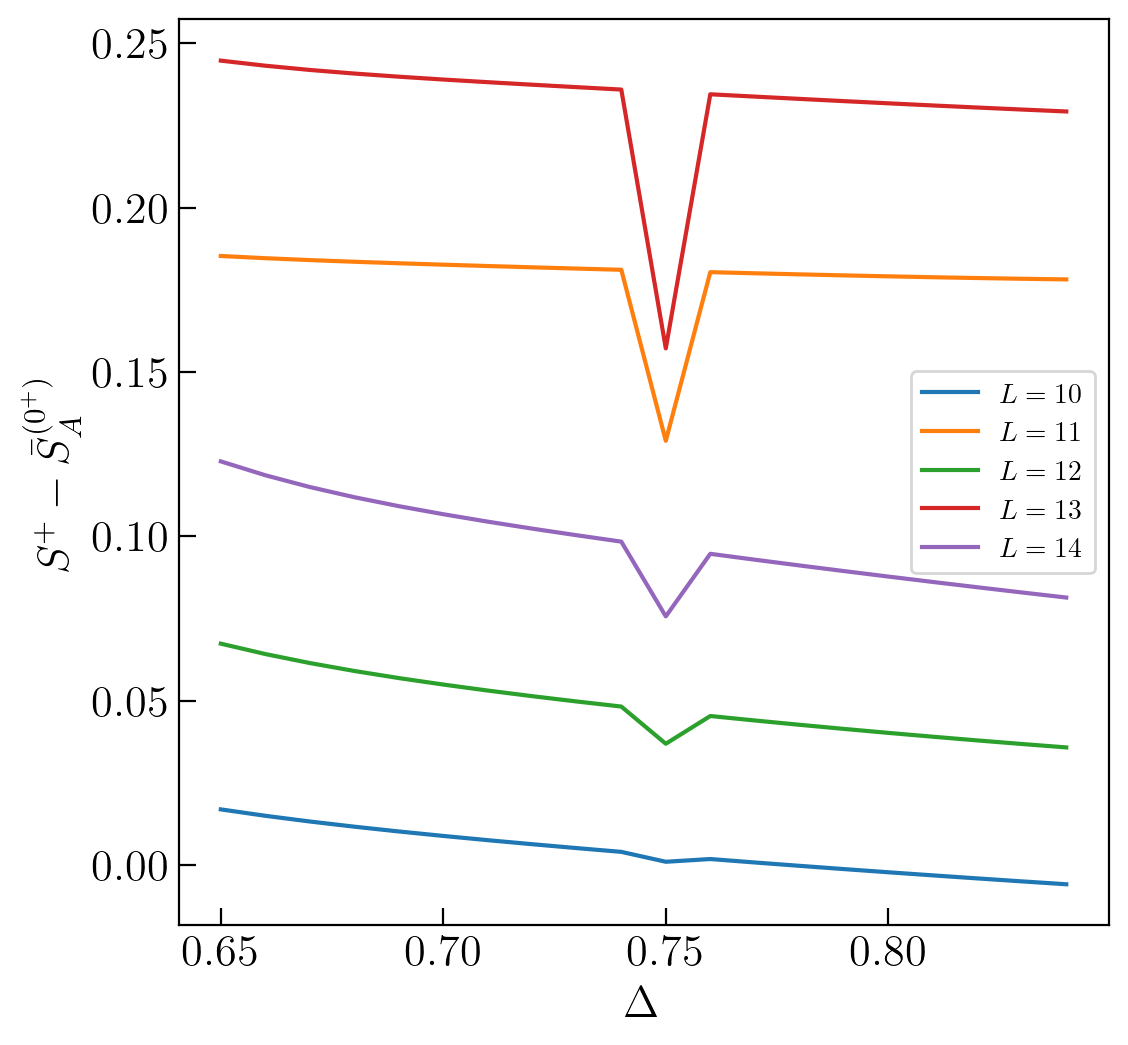

In [46]:

L=12
J1=1.0
d1=0.125
e1=0.5

J2=0.0
d2=0.0
e2=0.0

hx=0.0
hz=0.0

k=0
p=1
zx=1
zz=1

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(6,6), dpi = 200, sharey=True, sharex=True)

frac = lambda dim: 2*dim
sizes = np.array([10, 11, 12, 13, 14]) if BOUNDARY_COND == 'OBC' else np.array([14, 15, 16])
deltas = np.linspace(0.65, 0.84, 20)
print(deltas)

for L in sizes:


    real_sec, imag_sec = get_sectors(L, hx, hz)

    pred = L * (np.log(2) / 2 - 41 / 288)

    dim_tot = 2**L
    entropy = []
    gap_ratio = []
    for ii, d1 in enumerate(deltas):
    #for d1 in [0.75]:

        tot_degen = 0
        dim_check = 0
        Sent = 0
        ratio = 0
        counter = 0
        for [ks, ps, zxs, zzs] in (real_sec if BOUNDARY_COND == 'OBC' else (real_sec + imag_sec)):
            
            name = dir + 'Entropy/Eigenstate/' + info_sym(L, J1, J2, d1, d2, e1, e2, hx, hz, ks, ps, zxs, zzs) + "_subsize=%d"%(L//2) + ".hdf5"
            degen_num = 0
            if exists(name):
                with h5py.File(name, "r") as file:
                    energies = np.array(file.get('energies')[0])
                    entropies = np.array(file.get('entropy')[0])
                    
                    E_av = np.mean(energies)
                    index_meanE = min(range(len(energies)), key=lambda i: abs(energies[i] - E_av))

                    gaps = np.diff(energies)
                    r = np.minimum(gaps[:-1], gaps[1:]) / np.maximum(gaps[:-1], gaps[1:])
                    ratio += np.mean(r[ index_meanE - 250 : index_meanE + 250 ])
                    counter += 1

                    dim = energies.size
                    dim_check += dim
                    num = frac(dim)

                    
                    my_min = int(index_meanE - num / 2)
                    if my_min < 0: my_min = 0;  

                    my_max = int(index_meanE + num / 2) 
                    if my_max >= dim: my_max = dim

                    sample = entropies
                    if my_min > 0 and my_max < dim:
                        sample = entropies[my_min : my_max]
                    
                    Sent += np.mean(sample) * dim

                    e_list = list(energies)
                    degen_num = 0
                    degen = 0
                    some_sum = 0
                    for Eueue in energies:
                        num_of_occur = e_list.count(Eueue)
                        #if num_of_occur > 4:
                        #    print(L, ps, xs, Eueue, num_of_occur)
                        some_sum += num_of_occur
                        if num_of_occur > 1:
                            #print(Eueue, num_of_occur)
                            degen_num += 1
                        else:
                            degen += 1
                    
                    tot_degen += (degen_num / dim_tot)
                    if degen + degen_num != dim:
                        print(L, ps, zzs, zxs, degen, degen_num, num_of_occur, dim)
            else:
                print(name)
        Sent /= dim_check
        ratio /= counter

        entropy.append(Sent)
        print(L, np.round(d1, 4), Sent, pred, ratio, tot_degen)

        if dim_check != dim_tot: 
            print("FUCKITY FUCK", dim_check, dim_tot)
    
    entropy = np.array(entropy)
    axis.plot(deltas, pred - entropy, label=r"$L=%d$"%L)

    axis.legend()
        
    axis.set_ylabel(r"$S^+-\bar S_A^{(0^+)}$", fontsize=16)
    axis.set_xlabel(r"$\Delta$", fontsize=16)
    
    axis.tick_params(axis='both', which='major', direction="in",length=6, labelsize=16)#, length=font_size-4, width=0.05*font_size)
    axis.tick_params(axis='both', which='minor', direction="in",length=3, labelsize=16)#, length=0.2*(font_size-4), width=0.05*font_size)
